In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import platform
import matplotlib.pyplot as plt
if platform.system() =="Darwin": # MAC 인 경우
    plt.rc('font, family = AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1. 컬럼의 이름을 변경 -> [총금액, 팁, 성별, 흡연여부, 요일, 시간, 인원]
2. 총금액, 팁 컬럼의 데이터를 소수점 1자리만 두고 반올림
3. 식사 인원과 성별에 따른 (그룹화) 팁의 비율의 평균 값을 구하고 그래프 시각화(바 그래프)

In [4]:
tips.columns =['총금액', '팁', '성별', '흡연여부', '요일', '시간', '인원']
tips

,총금액,팁,성별,흡연여부,요일,시간,인원
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
import numpy as np
tips['총금액'] =  tips['총금액'].round(1)
tips['팁'] =  tips['팁'].round(1)

In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   총금액     244 non-null    float64 
 1   팁       244 non-null    float64 
 2   성별      244 non-null    category
 3   흡연여부    244 non-null    category
 4   요일      244 non-null    category
 5   시간      244 non-null    category
 6   인원      244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
tips['팁 비율'] = tips['팁']/tips['총금액'] * 100
tips.head(1)

,총금액,팁,성별,흡연여부,요일,시간,인원,팁 비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353


In [8]:
tips_1 = tips['인원','성별','팁'].groupby(['인원','성별']).mean()
tips_1

총금액         팁       팁 비율
인원 성별                                    
1  Male     8.600000  1.900000  22.093023
   Female   6.800000  1.266667  21.322912
2  Male    17.106122  2.615306  16.273796
   Female  15.344828  2.525862  17.053626
3  Male    24.291667  3.475000  14.763093
   Female  21.550000  3.257143  16.025679
4  Male    28.078571  4.171429  15.017047
   Female  30.277778  4.022222  13.267871
5  Male    30.150000  3.750000  13.371547
   Female  29.800000  5.100000  17.114094
6  Male    41.250000  5.850000  14.953486
   Female  28.400000  4.600000  16.306239

<AxesSubplot:xlabel='인원,성별'>

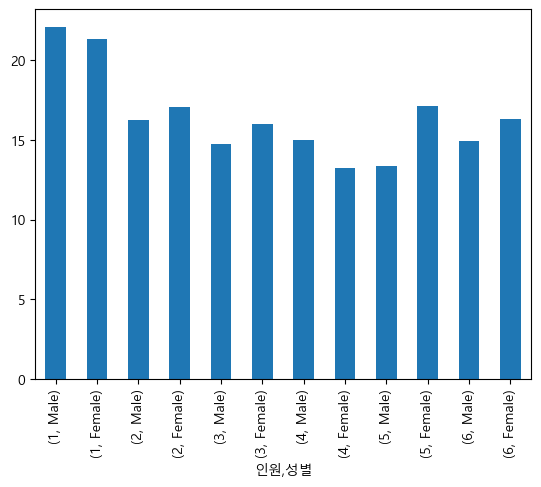

In [9]:
tips_1['팁 비율'].plot.bar()

In [10]:
tips_1.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

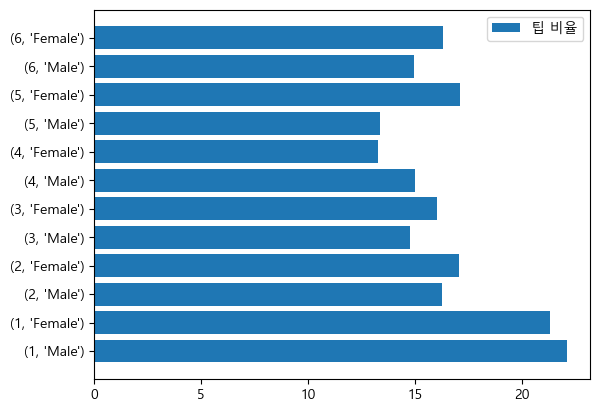

In [16]:
x = list(range(0, len(tips_1.index),  1))
y = tips_1['팁 비율']

plt.barh(x,y, label = '팁 비율')
plt.yticks(x, tips_1.index) # y데이터를 다른걸로 바꾸겠다
plt.legend()
plt.show()

In [23]:
tips_1 = tips[['인원','성별','팁 비율']].groupby(['인원','성별']).mean()
tips_1

팁 비율
인원 성별               
1  Male    22.093023
   Female  21.322912
2  Male    16.273796
   Female  17.053626
3  Male    14.763093
   Female  16.025679
4  Male    15.017047
   Female  13.267871
5  Male    13.371547
   Female  17.114094
6  Male    14.953486
   Female  16.306239

In [24]:
#남자의 데이터프레임
#여자의 데이터프레임 으로 나눈다.

male_data = pd.DataFrame()
female_data = pd.DataFrame()

for i in tips_1.index:
    if i[1] == 'Male':
        male_data = pd.concat([male_data, tips_1.loc[i]])
    else:
        female_data = pd.concat([female_data, tips_1.loc[i]])

male_data

,0
팁 비율,22.093023
팁 비율,16.273796
팁 비율,14.763093
팁 비율,15.017047
팁 비율,13.371547
팁 비율,14.953486


In [25]:
#남자의 데이터프레임
#여자의 데이터프레임 으로 나눈다.

male_data = pd.DataFrame()
female_data = pd.DataFrame()

for i in tips_1.index:
    if i[1] == 'Male':
        male_data = pd.concat([male_data, tips_1.loc[[i]]])
    else:
        female_data = pd.concat([female_data, tips_1.loc[[i]]])

male_data

,,팁 비율
인원,성별,
1,Male,22.093023
2,Male,16.273796
3,Male,14.763093
4,Male,15.017047
5,Male,13.371547
6,Male,14.953486


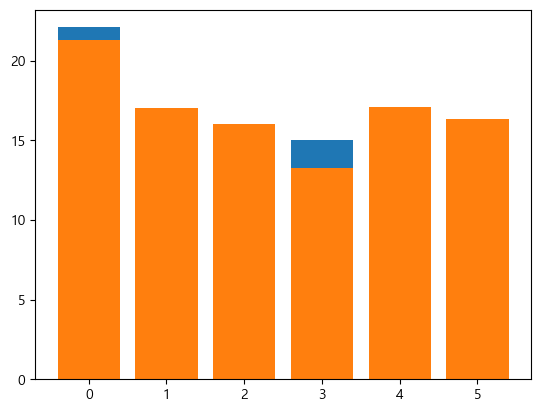

In [31]:
x = list(range(0, len(male_data.index),  1))
y = male_data['팁 비율']
x2 = list(range(0, len(female_data.index),  1))
y2 = female_data['팁 비율']

plt.bar(x,y, label = '팁 비율')
plt.bar(x2,y2, label = '팁 비율')
plt.show()

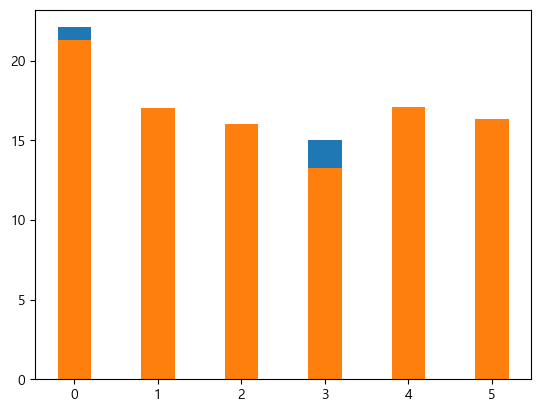

In [33]:
x = list(range(0, len(male_data.index),  1))
y = male_data['팁 비율']
x2 = list(range(0, len(female_data.index),  1))
y2 = female_data['팁 비율']

plt.bar(x,y, label = '팁 비율', width=0.4)
plt.bar(x2,y2, label = '팁 비율', width=0.4)
plt.show()

### pivot-table
1. 그룹화
2. 인덱스, 컬럼을 기준으로 그룹화
3. 데이터 집계를 나타낸다

In [37]:
pivot_data = pd.pivot_table(
    tips,
    index = '인원',
    columns = '성별',
    aggfunc= 'mean',
    values = ['팁 비율']
)

<AxesSubplot:xlabel='인원'>

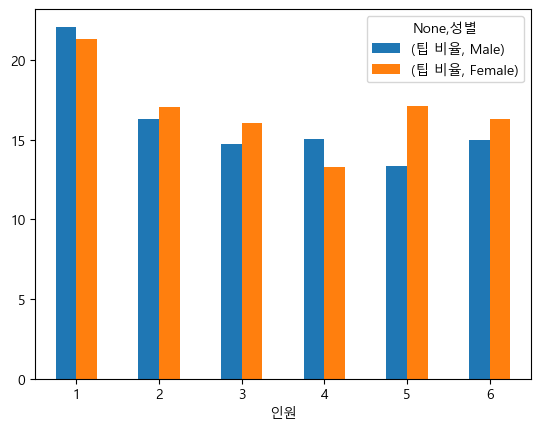

In [39]:

pivot_data.plot.bar(rot= 0)